In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import Image

# Enter your DPI here: 
my_dpi = 192

In [27]:
# Load in array of 201 images, create dataframe
phi = np.load("Phi_201snap.npy")
df = pd.DataFrame(index=np.arange(201), columns=np.arange(1))
df.rename(columns={0: 'norm'}, inplace=True)

r = np.linspace(1, 101, 101)
theta = np.linspace(0, 2 * np.pi, 227)
r_grid, theta_grid = np.meshgrid(r, theta, indexing='ij')

# Convert polar coordinates to Cartesian coordinates
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)

# Define the target grid for interpolation (203x203 pixels)
grid_x, grid_y = np.linspace(-101, 101, 203), np.linspace(-101, 101, 203)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

points = np.array([x.flatten(), y.flatten()]).T

for i in range(201):
    arr = phi[:,:,i]
    values = arr.flatten()
    
    # Interpolate the data to the Cartesian grid
    grid_z = griddata(points, values, (grid_x, grid_y), method='nearest')
    
    # Optional: Plot and save image
    # plt.imshow(grid_z, extent=(-101, 101, -101, 101), cmap='gray')
    # plt.axis("off")
    # plt.savefig('analysis2.2.jpg', bbox_inches='tight', pad_inches=0)
    # plt.close()
    
    output_array = np.zeros((101, 227))
    for rad in range(101):
        for ang in range(227):
            # Polar coordinates
            radius = r[rad]
            angle = theta[ang]
            
            # Convert to Cartesian coordinates
            x_cart = radius * np.cos(angle)
            y_cart = radius * np.sin(angle)
            
            # Find the nearest pixel in the Cartesian grid
            x_nearest = np.argmin(np.abs(grid_x[0] - x_cart))
            y_nearest = np.argmin(np.abs(grid_y[:, 0] - y_cart))
            
            # Get the raw values from grid_z and put into output array
            output_array[rad, ang] = grid_z[y_nearest, x_nearest]
            
    # Compute norm, add to dataframe
    norm_sq = 0
    diff_array = output_array - data
    norm = np.linalg.norm(diff_array)

    # for row in range(101):
    #     for col in range(227):
    #         norm_sq += (diff_array[row][col])**2
    # norm = norm_sq**0.5
    
    df.at[i, 'norm'] = norm
df

,norm
0,6.359312
1,6.359312
2,6.359312
3,6.359312
4,6.359312
...,...
196,17.609869
197,19.367661
198,23.459055
199,25.849915


(203, 203, 3)

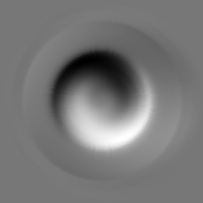

In [26]:
# Testing with i=160

phi = np.load("Phi_201snap.npy")
r = np.linspace(1, 101, 101)
theta = np.linspace(0, 2 * np.pi, 227)
r_grid, theta_grid = np.meshgrid(r, theta, indexing='ij')

# Convert polar coordinates to Cartesian coordinates
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)

# Define the target grid for interpolation (203x203 pixels)
grid_x, grid_y = np.linspace(-101, 101, 203), np.linspace(-101, 101, 203)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

points = np.array([x.flatten(), y.flatten()]).T

data = phi[:,:,160]
values = data.flatten()
    
# Interpolate the data to the Cartesian grid
grid_z = griddata(points, values, (grid_x, grid_y), method='nearest')
    
# Optional: Plot and save image
plt.figure(figsize=(264/my_dpi, 264/my_dpi), dpi=my_dpi)
plt.imshow(grid_z, extent=(-101, 101, -101, 101), cmap='gray')
plt.axis("off")
plt.savefig('analysis2.2.jpg', bbox_inches='tight', pad_inches=0)
im = Image.open('analysis2.2.jpg')
output_array = np.asarray(im)
output_array.shape